## Syed Ali
## COSC 819 Project Report Appendix

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization 
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools

C:\Users\syeda\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\syeda\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\syeda\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\syeda\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\f

In [28]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9287754373057749166
]


# Performing CNN on MNIST Samples

In [2]:
#load in the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape", x_train.shape)

x_train.shape (60000, 28, 28)


In [3]:
# the data is only 2D
# convolution expects a height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [4]:
# number of classes
k = len(set(y_train))
print("number of classes", k)

number of classes 10


In [5]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dense(k, activation = 'softmax')(x)

model = Model(i, x)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
#compile and fit
#Note: using GPU 
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 9s 156us/sample - loss: 0.5075 - acc: 0.8111 - val_loss: 0.3964 - val_acc: 0.8481
Epoch 2/15
60000/60000 [==============================] - 10s 171us/sample - loss: 0.3495 - acc: 0.8684 - val_loss: 0.3395 - val_acc: 0.8726
Epoch 3/15
60000/60000 [==============================] - 11s 180us/sample - loss: 0.3039 - acc: 0.8849 - val_loss: 0.3405 - val_acc: 0.8696
Epoch 4/15
60000/60000 [==============================] - 11s 184us/sample - loss: 0.2699 - acc: 0.8982 - val_loss: 0.3073 - val_acc: 0.8873
Epoch 5/15
60000/60000 [==============================] - 11s 185us/sample - loss: 0.2442 - acc: 0.9070 - val_loss: 0.2853 - val_acc: 0.8972
Epoch 6/15
60000/60000 [==============================] - 12s 194us/sample - loss: 0.2216 - acc: 0.9151 - val_loss: 0.2862 - val_acc: 0.9000
Epoch 7/15
60000/60000 [==============================] - 11s 188us/sample - loss: 0.2024 - acc: 0.9232 -

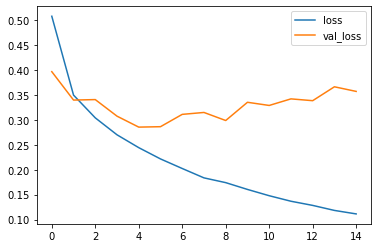

In [7]:
# plot loss per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

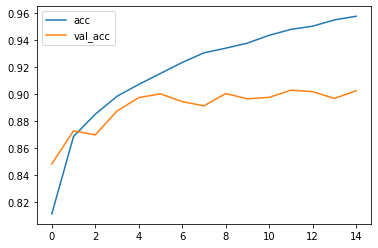

In [8]:
#plot accuracy per iteration
plt.plot(r.history['acc'], label = 'acc')
plt.plot(r.history['val_acc'], label = 'val_acc')
plt.legend()

Confusion matrix, without normalization
[[837   1  22  25   1   1 109   0   4   0]
 [  2 978   0  12   2   0   4   0   2   0]
 [ 13   2 869  10  47   0  58   0   1   0]
 [  8   9  16 924  22   0  21   0   0   0]
 [  1   1  60  33 820   0  83   0   2   0]
 [  0   1   0   0   0 981   0  14   0   4]
 [ 86   0  78  22  81   0 724   0   9   0]
 [  0   0   0   1   0  16   0 966   0  17]
 [  0   1   5   3   5   3   5   1 976   1]
 [  0   0   0   0   0   8   1  43   0 948]]


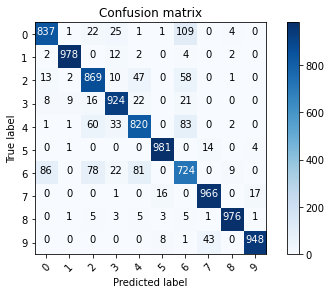

In [9]:
def plot_confusion_matrix(cm, classes, 
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix. 
    Normalization can be applied by setting 'normalize = True'
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment = "center",
                 color = "white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))
    

In [10]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

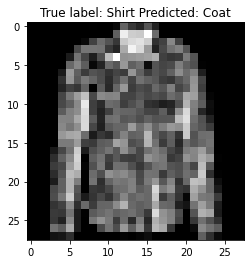

In [11]:
#compute some misclassified examples
misclassified_idx = np.where( p_test != y_test )[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

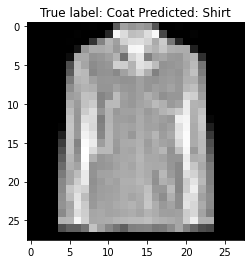

In [12]:
#compute some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

# Performing CNN on Cifar-10 data

In [13]:
#load in the dataset
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape (50000, 32, 32, 3)
y_train.shape (50000,)


In [14]:
# number of classes
k = len(set(y_train))
print("number of classes", k)

number of classes 10


In [15]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dense(k, activation = 'softmax')(x)

model = Model(i, x)

In [16]:
#compile and fit
#Note: using GPU 
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 16s 327us/sample - loss: 1.5237 - acc: 0.4472 - val_loss: 1.2361 - val_acc: 0.5549
Epoch 2/15
50000/50000 [==============================] - 17s 335us/sample - loss: 1.1725 - acc: 0.5818 - val_loss: 1.1181 - val_acc: 0.5937
Epoch 3/15
50000/50000 [==============================] - 17s 337us/sample - loss: 1.0074 - acc: 0.6421 - val_loss: 0.9776 - val_acc: 0.6547
Epoch 4/15
50000/50000 [==============================] - 17s 339us/sample - loss: 0.8866 - acc: 0.6861 - val_loss: 1.0111 - val_acc: 0.6444
Epoch 5/15
50000/50000 [==============================] - 17s 343us/sample - loss: 0.7827 - acc: 0.7238 - val_loss: 0.9044 - val_acc: 0.6838
Epoch 6/15
50000/50000 [==============================] - 17s 334us/sample - loss: 0.6908 - acc: 0.7539 - val_loss: 0.9095 - val_acc: 0.6891
Epoch 7/15
50000/50000 [==============================] - 16s 318us/sample - loss: 0.6105 - acc: 0.7818 

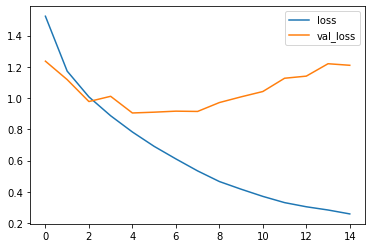

In [17]:
# plot loss per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

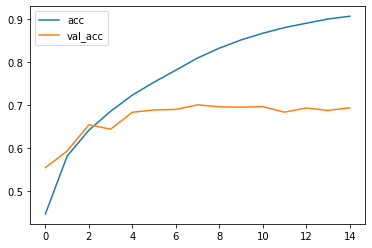

In [18]:
#plot accuracy per iteration
plt.plot(r.history['acc'], label = 'acc')
plt.plot(r.history['val_acc'], label = 'val_acc')
plt.legend()

Confusion matrix, without normalization
[[735  26  47  16  18   5  13  11  80  49]
 [ 16 849   4   6   5   5  15   6  21  73]
 [ 71  10 572  50  85  63  87  41  15   6]
 [ 23  22  74 417  87 178 100  55  20  24]
 [ 30   6  75  55 629  40  77  74  13   1]
 [ 13  10  65 170  62 552  36  66  11  15]
 [  8   4  36  56  28  24 820   8   6  10]
 [ 13   6  27  37  57  52  22 765   6  15]
 [ 58  44  11  17   5   3   9   3 814  36]
 [ 28 103   8  10   7   9  11  15  21 788]]


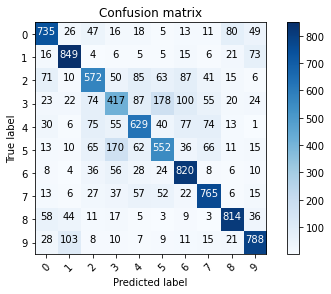

In [19]:
def plot_confusion_matrix(cm, classes, 
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix. 
    Normalization can be applied by setting 'normalize = True'
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment = "center",
                 color = "white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [20]:
# Label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

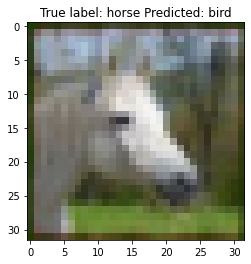

In [21]:
#compute some misclassified examples
misclassified_idx = np.where( p_test != y_test )[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

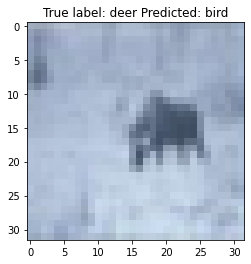

In [22]:
#compute some misclassified examples
misclassified_idx = np.where( p_test != y_test )[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

# Augmenting CIFAR-10 Data using Batch Normalization

In [23]:
#load in the dataset
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape (50000, 32, 32, 3)
y_train.shape (50000,)


In [24]:
# number of classes
k = len(set(y_train))
print("number of classes", k)

number of classes 10


In [25]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(i)
x = BatchNormalization()(x)

x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128,(3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

x = Conv2D(128,(3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation = 'softmax')(x)

model = Model(i,x)

In [26]:
#compile and fit
#Note: using GPU 
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 50)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 240s 5ms/sample - loss: 1.3049 - acc: 0.5529 - val_loss: 0.9827 - val_acc: 0.6580
Epoch 2/50
50000/50000 [==============================] - 236s 5ms/sample - loss: 0.8495 - acc: 0.7066 - val_loss: 0.8603 - val_acc: 0.7077
Epoch 3/50
50000/50000 [==============================] - 237s 5ms/sample - loss: 0.6946 - acc: 0.7617 - val_loss: 0.6805 - val_acc: 0.7699
Epoch 4/50
50000/50000 [==============================] - 239s 5ms/sample - loss: 0.5864 - acc: 0.8006 - val_loss: 0.8552 - val_acc: 0.7293
Epoch 5/50
50000/50000 [==============================] - 244s 5ms/sample - loss: 0.4939 - acc: 0.8280 - val_loss: 0.6109 - val_acc: 0.7991
Epoch 6/50
50000/50000 [==============================] - 240s 5ms/sample - loss: 0.4266 - acc: 0.8535 - val_loss: 0.5846 - val_acc: 0.8153
Epoch 7/50
50000/50000 [==============================] - 244s 5ms/sample - loss: 0.3568 - acc: 0.8781 - val_l

KeyboardInterrupt: 

In [ ]:
#fit with data augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data = (x_test, y_test), steps_per_epoch = steps_per_epoch, epochs = 50)

In [ ]:
# plot loss per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [ ]:
#plot accuracy per iteration
plt.plot(r.history['acc'], label = 'acc')
plt.plot(r.history['val_acc'], label = 'val_acc')
plt.legend()

In [ ]:
def plot_confusion_matrix(cm, classes, 
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix. 
    Normalization can be applied by setting 'normalize = True'
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment = "center",
                 color = "white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# Label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

In [ ]:
#compute some misclassified examples
misclassified_idx = np.where( p_test != y_test )[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [ ]:
model.summary()